# Extracción y Creación de la base de datos

In [40]:
# Conectarse la base de datos en sqlite
import sqlite3

# Crear y conectarse a la base de datos
con = sqlite3.connect("../data/raw/wine_store.db")

In [2]:
# Librerias para la web scrapping
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup as soup

# scrapping de la pagina: https://cav.cl/tienda
data_wine = []
driver = webdriver.Chrome()
for x in range(50):
    url = f"https://cav.cl/tienda?q=&hPP=20&idx=products&p={x}&fR%5Bfamily.name%5D%5B0%5D=Vinos&is_v=1"
    driver.get(url)
    driver.implicitly_wait(3)
    try:
        age_verification_popup = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, 'modalAge'))
        )
        yes_button = age_verification_popup.find_element(By.XPATH, "//button[contains(., 'SI')]")
        yes_button.click()
    except:
        pass
    
    page_soup = soup(driver.page_source, 'html.parser')
    
    info = []
    for article in page_soup.find_all("article"):
        id = article.attrs.get("data-id")
        sku = article.attrs.get("data-sku")
        name = article.attrs.get("data-name")
        brand = article.attrs.get("data-brand")
        category = article.attrs.get("data-category")
        variant = article.attrs.get("data-variant")
        ref = article.find("a").attrs.get("href")
        info.append([id, sku, name, brand, category, variant, ref])
    
    data_wine.append(info)
    
driver.quit()

In [3]:
# Redimensionar la data extraida
rs_data_wine = []

for sublist in data_wine:
    rs_data_wine.extend(sublist)
    
# primera vista de los datos
rs_data_wine

[['13733',
  '30491',
  'Pack Errazuriz Don Maximiano Cosechas Historicas  2010 - 2013 - 2015',
  'Sin Informacion',
  'Sin Informacion',
  'Sin Informacion',
  '/tienda/producto/pack-errazuriz-don-maximiano-cosechas-historicas-2010-2013-2015-30491'],
 ['14294',
  '31483',
  'Pack Aresti Trisquel Carmenere 2020 + Family Collection Carmenere',
  'Sin Informacion',
  'Sin Informacion',
  'Sin Informacion',
  '/tienda/producto/pack-aresti-trisquel-carmenere-2020-family-collection-carmenere-31483'],
 ['14293',
  '31482',
  'Pack Descorchador Electrico + Vino Morande Seleccion De Viñedos Carmenere',
  'Sin Informacion',
  'Sin Informacion',
  'Sin Informacion',
  '/tienda/producto/pack-descorchador-electrico-vino-morande-seleccion-de-vinedos-carmenere-31482'],
 ['14292',
  '31481',
  'Pack Decantandor U Joes + Vino Viña Andes Plateau Andesita Cs',
  'Sin Informacion',
  'Sin Informacion',
  'Sin Informacion',
  '/tienda/producto/pack-decantandor-u-joes-vino-vina-andes-plateau-andesita-cs-31

In [4]:
# Importar libreria para crear dataframe
import pandas as pd

# Crear un Data Frame de la data extraida
productos_df = pd.DataFrame(rs_data_wine, columns=['id', 'sku', 'nombre', 'marca', 'categoria', 'variedad', 'url_ref'])
productos_df

,id,sku,nombre,marca,categoria,variedad,url_ref
0,13733,30491,Pack Errazuriz Don Maximiano Cosechas Historic...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-errazuriz-don-maximiano-...
1,14294,31483,Pack Aresti Trisquel Carmenere 2020 + Family C...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-aresti-trisquel-carmener...
2,14293,31482,Pack Descorchador Electrico + Vino Morande Sel...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-descorchador-electrico-v...
3,14292,31481,Pack Decantandor U Joes + Vino Viña Andes Plat...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-decantandor-u-joes-vino-...
4,14291,31480,Pack Copas Riedel Overture + Vino Clos De Luz ...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-copas-riedel-overture-vi...
...,...,...,...,...,...,...,...
2175,12374,28346,Viu Manent Single Vineyard Syrah El Olivar 2019,Viu Manent,Tinto,Syrah,/tienda/producto/viu-manent-single-vineyard-sy...
2176,11391,26896,Viu Manent Single Vineyard Syrah El Olivar 2018,Viu Manent,Tinto,Syrah,/tienda/producto/viu-manent-single-vineyard-sy...
2177,11783,27585,Cousiño Macul Finis Terrae Ensamblaje Blanco 2018,Cousiño Macul,Ensamblaje Blanco,Ensamblaje Blanco,/tienda/producto/cousino-macul-finis-terrae-en...
2178,14097,31075,Arboleda Sauvignon Blanc 2022,Arboleda,Blanco,Sauvignon Blanc,/tienda/producto/arboleda-sauvignon-blanc-2022...


In [5]:
# Eliminar duplicados
productos_df.drop_duplicates("id", inplace=True)
productos_df


,id,sku,nombre,marca,categoria,variedad,url_ref
0,13733,30491,Pack Errazuriz Don Maximiano Cosechas Historic...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-errazuriz-don-maximiano-...
1,14294,31483,Pack Aresti Trisquel Carmenere 2020 + Family C...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-aresti-trisquel-carmener...
2,14293,31482,Pack Descorchador Electrico + Vino Morande Sel...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-descorchador-electrico-v...
3,14292,31481,Pack Decantandor U Joes + Vino Viña Andes Plat...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-decantandor-u-joes-vino-...
4,14291,31480,Pack Copas Riedel Overture + Vino Clos De Luz ...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-copas-riedel-overture-vi...
...,...,...,...,...,...,...,...
2175,12374,28346,Viu Manent Single Vineyard Syrah El Olivar 2019,Viu Manent,Tinto,Syrah,/tienda/producto/viu-manent-single-vineyard-sy...
2176,11391,26896,Viu Manent Single Vineyard Syrah El Olivar 2018,Viu Manent,Tinto,Syrah,/tienda/producto/viu-manent-single-vineyard-sy...
2177,11783,27585,Cousiño Macul Finis Terrae Ensamblaje Blanco 2018,Cousiño Macul,Ensamblaje Blanco,Ensamblaje Blanco,/tienda/producto/cousino-macul-finis-terrae-en...
2178,14097,31075,Arboleda Sauvignon Blanc 2022,Arboleda,Blanco,Sauvignon Blanc,/tienda/producto/arboleda-sauvignon-blanc-2022...


In [6]:
# Eliminar los pack de varios productos
productos_df = productos_df.drop(productos_df[(productos_df["marca"] == "Sin Informacion") & (productos_df["categoria"] == "Sin Informacion") & (productos_df["variedad"] == "Sin Informacion")].index )
productos_df.reset_index(inplace=True)
productos_df

,index,id,sku,nombre,marca,categoria,variedad,url_ref
0,9,12840,28813,San Pedro Castillo De Molina Tributo Gran Rese...,San Pedro,Tinto,Cabernet Sauvignon,/tienda/producto/san-pedro-castillo-de-molina-...
1,10,14329,31583,San Pedro 1865 Old Vines Cabernet Sauvignon 2020,San Pedro,Tinto,Cabernet Sauvignon,/tienda/producto/san-pedro-1865-old-vines-cabe...
2,11,13884,30743,La Rosa Cornellana Volcano Sedimentario Cabern...,La Rosa,Tinto,Cabernet Franc,/tienda/producto/la-rosa-cornellana-volcano-se...
3,12,14332,31586,Concha y Toro Terrunyo Carmenere 2021,Concha Y Toro,Tinto,Carmenere,/tienda/producto/concha-y-toro-terrunyo-carmen...
4,13,14041,30991,San Pedro Castillo De Molina Carmenere Gran Re...,San Pedro,Tinto,Carmenere,/tienda/producto/san-pedro-castillo-de-molina-...
...,...,...,...,...,...,...,...,...
973,2175,12374,28346,Viu Manent Single Vineyard Syrah El Olivar 2019,Viu Manent,Tinto,Syrah,/tienda/producto/viu-manent-single-vineyard-sy...
974,2176,11391,26896,Viu Manent Single Vineyard Syrah El Olivar 2018,Viu Manent,Tinto,Syrah,/tienda/producto/viu-manent-single-vineyard-sy...
975,2177,11783,27585,Cousiño Macul Finis Terrae Ensamblaje Blanco 2018,Cousiño Macul,Ensamblaje Blanco,Ensamblaje Blanco,/tienda/producto/cousino-macul-finis-terrae-en...
976,2178,14097,31075,Arboleda Sauvignon Blanc 2022,Arboleda,Blanco,Sauvignon Blanc,/tienda/producto/arboleda-sauvignon-blanc-2022...


In [7]:
# Eliminar la columna "index" y completar la información de la columna "url_ref"
productos_df.drop(["index"], axis=1, inplace=True)
productos_df['url_ref'] = 'https://cav.cl/' + productos_df['url_ref'].astype(str)
productos_df

,id,sku,nombre,marca,categoria,variedad,url_ref
0,12840,28813,San Pedro Castillo De Molina Tributo Gran Rese...,San Pedro,Tinto,Cabernet Sauvignon,https://cav.cl//tienda/producto/san-pedro-cast...
1,14329,31583,San Pedro 1865 Old Vines Cabernet Sauvignon 2020,San Pedro,Tinto,Cabernet Sauvignon,https://cav.cl//tienda/producto/san-pedro-1865...
2,13884,30743,La Rosa Cornellana Volcano Sedimentario Cabern...,La Rosa,Tinto,Cabernet Franc,https://cav.cl//tienda/producto/la-rosa-cornel...
3,14332,31586,Concha y Toro Terrunyo Carmenere 2021,Concha Y Toro,Tinto,Carmenere,https://cav.cl//tienda/producto/concha-y-toro-...
4,14041,30991,San Pedro Castillo De Molina Carmenere Gran Re...,San Pedro,Tinto,Carmenere,https://cav.cl//tienda/producto/san-pedro-cast...
...,...,...,...,...,...,...,...
973,12374,28346,Viu Manent Single Vineyard Syrah El Olivar 2019,Viu Manent,Tinto,Syrah,https://cav.cl//tienda/producto/viu-manent-sin...
974,11391,26896,Viu Manent Single Vineyard Syrah El Olivar 2018,Viu Manent,Tinto,Syrah,https://cav.cl//tienda/producto/viu-manent-sin...
975,11783,27585,Cousiño Macul Finis Terrae Ensamblaje Blanco 2018,Cousiño Macul,Ensamblaje Blanco,Ensamblaje Blanco,https://cav.cl//tienda/producto/cousino-macul-...
976,14097,31075,Arboleda Sauvignon Blanc 2022,Arboleda,Blanco,Sauvignon Blanc,https://cav.cl//tienda/producto/arboleda-sauvi...


In [8]:
productos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         978 non-null    object
 1   sku        978 non-null    object
 2   nombre     978 non-null    object
 3   marca      978 non-null    object
 4   categoria  978 non-null    object
 5   variedad   978 non-null    object
 6   url_ref    978 non-null    object
dtypes: object(7)
memory usage: 53.6+ KB


In [41]:
# Crear la tabla productos en la base de datos
con.execute(
    """
    CREATE TABLE IF NOT EXISTS productos(
        id INT PRIMARY KEY NOT NULL,
        sku INT NOT NULL,
        nombre VARCHAR(100000),
        marca VARCHAR(255),
        categoria VARCHAR(255),
        variedad VARCHAR(1000),
        url_ref VARCHAR(1000000)
    );
    """
)

In [42]:
# Guardar los valores del dataframe en la tabla creada
productos_df.to_sql("productos", con=con, if_exists="replace", index=False)

# Hacer commit en la base de datos y terminar la conexión
con.commit()
con.close()

### Obtener la la descripción de los productos

In [43]:
# Leer la tabla productos como dataframe
con = sqlite3.connect("../data/raw/wine_store.db")
select_productos =  "SELECT * FROM productos;"
productos_df = pd.read_sql_query(select_productos, con)

# Leer las URL desde productos_df
url_list = []
for index, row in productos_df.iterrows():
    url = row["url_ref"]
    url_list.append(url)

url_list

['https://cav.cl//tienda/producto/san-pedro-castillo-de-molina-tributo-gran-reserva-cabernet-sauvignon-2020-28813',
 'https://cav.cl//tienda/producto/san-pedro-1865-old-vines-cabernet-sauvignon-2020-31583',
 'https://cav.cl//tienda/producto/la-rosa-cornellana-volcano-sedimentario-cabernet-franc-2020-30743',
 'https://cav.cl//tienda/producto/concha-y-toro-terrunyo-carmenere-2021-31586',
 'https://cav.cl//tienda/producto/san-pedro-castillo-de-molina-carmenere-gran-reserva-2022-30991',
 'https://cav.cl//tienda/producto/romelio-ensamblaje-tinto-2019-28655',
 'https://cav.cl//tienda/producto/la-rosa-cornellana-volcano-sedimentario-syrah-2020-30595',
 'https://cav.cl//tienda/producto/miguel-torres-estelado-brut-rose-750cc-13248',
 'https://cav.cl//tienda/producto/humo-blanco-latelier-naranjo-2022-31304',
 'https://cav.cl//tienda/producto/undurraga-th-rarities-garnachacarinenamonastrell-2020-29341',
 'https://cav.cl//tienda/producto/errazuriz-aconcagua-cuvee-cabernet-sauvignon-gran-reserva-20

In [44]:
# Creamos la tabla de descripción de producto
con.execute(
    '''
    CREATE TABLE IF NOT EXISTS descripcion_productos (
        url_product TEXT,
        product_internal_id TEXT,
        product_code TEXT,
        product_name TEXT,
        product_brand TEXT,
        product_category TEXT,
        variant TEXT,
        price TEXT,
        cav_points TEXT,
        description TEXT,
        member_price TEXT,
        normal_price TEXT,
        stock TEXT,
        image_url TEXT,
        vina TEXT,
        cepa TEXT,
        cosecha TEXT,
        procedencia TEXT,
        linea TEXT,
        formato TEXT,
        tipo TEXT,
        alcohol TEXT,
        mezcla TEXT,
        guarda TEXT,
        maridaje TEXT,
        cuerpo FLOAT,
        frescor FLOAT,
        dulzura FLOAT,
        astringencia FLOAT
    )
    '''
)

In [14]:
# Haciendo scrap de la descripción de cada producto
all_product_data = []
driver = webdriver.Chrome()
for url in url_list:
    url = url
    driver.get(url)
    driver.implicitly_wait(3)
    try:
        age_verification_popup = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, 'modalAge'))
        )
        yes_button = age_verification_popup.find_element(By.XPATH, "//button[contains(., 'SI')]")
        yes_button.click()
    except:
        pass
    
    page_soup = soup(driver.page_source, 'html.parser')
    
    # Acceder a los atributos 'data-*' de la etiqueta 'section'
    product_section = page_soup.select_one('section.c-product')

    product_id = product_section['data-id']
    product_sku = product_section['data-sku']
    product_name = product_section['data-name']
    product_brand = product_section['data-brand']
    product_category = product_section['data-category']
    product_variant = product_section['data-variant']
    product_price = product_section['data-price']

    # Acceder a la ficha técnica
    wine_table = page_soup.find('table', class_='table table-striped')

    # Inicializar variables para los campos de la tabla
    wine_data = {
        "Viña": "",
        "Cepa": "",
        "Cosecha": "",
        "Procedencia": "",
        "Línea": "",
        "Formato": "",
        "Tipo": "",
        "Alcohol": "",
        "Mezcla": "",
        "Guarda": "",
        "Maridaje": ""
    }

    if wine_table:
        # Obtener todas las filas de la tabla
        rows = wine_table.find_all('tr')

        for row in rows:
            header = row.find('th')
            data = row.find('td')

            if header and data:
                header_text = header.text.strip()
                data_text = data.text.strip()

                # Asignar los datos a las categorías correspondientes
                if header_text in wine_data:
                    wine_data[header_text] = data_text

    # Acceder al puntaje y calificaciones
    score_section = product_section.select_one('.c-product__score')

    if score_section is not None:
        lacav_score_element = score_section.select_one('.o-score--lacav .o-score__points')
        if lacav_score_element is not None:
            lacav_score = lacav_score_element.text
        else:
            lacav_score = "No score available"
    else:
        lacav_score = "No score available"

    # description
    description = page_soup.select_one('.c-product__body p').text.strip()

    # Información de precios y stock
    price_info = page_soup.select_one('.c-product__price')
    socio_price = price_info.select('p.o-text--price-store')[0].text
    normal_price = price_info.select('p.o-text--small')[0].text
    stock = price_info.select('p.o-text--small')[1].text

    # Acceder a la image_url
    product_image = page_soup.select_one('div.c-product__thumb img')['src']

    # Acceder a la sección de percepción
    sheet_body = page_soup.select_one('div.c-sheet__body')
    dl_elements = sheet_body.find_all('dl', class_='c-sheet__feature--chart') if sheet_body else []

    perception_data = {}

    for dl in dl_elements:
        # Acceder al contenido de c-sheet__signify
        signify = dl.select_one('dd.c-sheet__signify').text.strip()

        # Acceder al contenido de c-chart__track
        chart_track = dl.select_one('div.c-chart__track')
        chart_class_element = chart_track.find('div', class_='c-chart__percent') if chart_track else None
        if chart_class_element and 'class' in chart_class_element.attrs:
            chart_class = chart_class_element['class'][1]

        # Mapear chart_class a su valor correspondiente
        chart_class_map = {
            'c-chart__percent--0': 0,
            'c-chart__percent--20': 0.2,
            'c-chart__percent--40': 0.4,
            'c-chart__percent--60': 0.6,
            'c-chart__percent--80': 0.8,
            'c-chart__percent--100': 1
        }
        chart_value = chart_class_map.get(chart_class, None)

        perception_data[signify] = chart_value

    # Crear un diccionario con la información
    product_data = {
        "url_product": url,
        "product_internal_id": product_id,
        "product_code": product_sku,
        "product_name": product_name,
        "product_brand": product_brand,
        "product_category": product_category,
        "variant": product_variant,
        "price": product_price,
        "cav_points": lacav_score,
        "description": description,
        "member_price": socio_price,
        "normal_price": normal_price,
        "stock": stock,
        "image_url": product_image,
        "vina": wine_data["Viña"],
        "cepa": wine_data["Cepa"],
        "cosecha": wine_data["Cosecha"],
        "procedencia": wine_data["Procedencia"],
        "linea": wine_data["Línea"],
        "formato": wine_data["Formato"],
        "tipo": wine_data["Tipo"],
        "alcohol": wine_data["Alcohol"],
        "mezcla": wine_data["Mezcla"],
        "guarda": wine_data["Guarda"],
        "maridaje": wine_data["Maridaje"],
        **perception_data  # Agregar datos de percepción
    }

    all_product_data.append(product_data)

driver.quit()

all_product_data

[{'url_product': 'https://cav.cl//tienda/producto/san-pedro-castillo-de-molina-tributo-gran-reserva-cabernet-sauvignon-2020-28813',
  'product_internal_id': '12840',
  'product_code': '28813',
  'product_name': 'San Pedro Castillo De Molina Tributo Gran Reserva Cabernet Sauvignon 2020',
  'product_brand': 'San Pedro',
  'product_category': 'Tinto',
  'variant': 'Cabernet Sauvignon',
  'price': '10990',
  'cav_points': '92',
  'description': 'Rojo teja. Nariz perfumada, moras, frambuesas en su jugo, chocolate amargo, caramelo, mentol. En la boca es jugoso, maduro, rugoso, de cuerpo medio, algo cálido.',
  'member_price': 'Socio: $9.891',
  'normal_price': 'Normal: $10.990',
  'stock': 'Stock: 50+',
  'image_url': 'https://cav.cl/storage/sku_images/28813.jpg',
  'vina': 'San Pedro',
  'cepa': 'Cabernet Sauvignon',
  'cosecha': '2020',
  'procedencia': 'Maipo',
  'linea': 'Gran Reserva',
  'formato': '750 Cc',
  'tipo': 'Tinto',
  'alcohol': '',
  'mezcla': '',
  'guarda': '',
  'maridaje

In [15]:
descripcion_productos_df = pd.DataFrame(all_product_data)
descripcion_productos_df

,url_product,product_internal_id,product_code,product_name,product_brand,product_category,variant,price,cav_points,description,...,formato,tipo,alcohol,mezcla,guarda,maridaje,Frescor,Cuerpo,Dulzura,Astringencia
0,https://cav.cl//tienda/producto/san-pedro-cast...,12840,28813,San Pedro Castillo De Molina Tributo Gran Rese...,San Pedro,Tinto,Cabernet Sauvignon,10990,92,"Rojo teja. Nariz perfumada, moras, frambuesas ...",...,750 Cc,Tinto,,,,"Comida Chilena, Cerdo.",NaN,NaN,NaN,NaN
1,https://cav.cl//tienda/producto/san-pedro-1865...,14329,31583,San Pedro 1865 Old Vines Cabernet Sauvignon 2020,San Pedro,Tinto,Cabernet Sauvignon,21990,No score available,,...,750 Cc,Tinto,,,,,NaN,NaN,NaN,NaN
2,https://cav.cl//tienda/producto/la-rosa-cornel...,13884,30743,La Rosa Cornellana Volcano Sedimentario Cabern...,La Rosa,Tinto,Cabernet Franc,16490,No score available,,...,750 Cc,Tinto,,,,,NaN,NaN,NaN,NaN
3,https://cav.cl//tienda/producto/concha-y-toro-...,14332,31586,Concha y Toro Terrunyo Carmenere 2021,Concha Y Toro,Tinto,Carmenere,24990,No score available,Rojo violeta profundo. Nariz a frutilla macera...,...,750 Cc,Tinto,,,,"Comida Chilena, Cerdo.",NaN,NaN,NaN,NaN
4,https://cav.cl//tienda/producto/san-pedro-cast...,14041,30991,San Pedro Castillo De Molina Carmenere Gran Re...,San Pedro,Tinto,Carmenere,8490,No score available,Rojo cereza limpio y brillante. Aromas a framb...,...,750 Cc,Tinto,,,,"Quesos, Carnes de Caza.",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,https://cav.cl//tienda/producto/viu-manent-sin...,12374,28346,Viu Manent Single Vineyard Syrah El Olivar 2019,Viu Manent,Tinto,Syrah,17990,92,"Violeta intenso. Nariz a moras, frambuesa, cho...",...,750 Cc,Tinto,,,,"Cerdo, Cordero.",NaN,NaN,NaN,NaN
974,https://cav.cl//tienda/producto/viu-manent-sin...,11391,26896,Viu Manent Single Vineyard Syrah El Olivar 2018,Viu Manent,Tinto,Syrah,17990,93,"Violeta intenso. Nariz a moras, frambuesa, cho...",...,750 Cc,Tinto,14°,SY,Guardar 4 años,"Cerdo, Cordero.",0.4,0.6,0.8,0.6
975,https://cav.cl//tienda/producto/cousino-macul-...,11783,27585,Cousiño Macul Finis Terrae Ensamblaje Blanco 2018,Cousiño Macul,Ensamblaje Blanco,Ensamblaje Blanco,18100,No score available,Amarillo verdoso brillante. Aromas frescos y ...,...,750 Cc,Ensamblaje Blanco,,,,"Pescados, Mariscos.",NaN,NaN,NaN,NaN
976,https://cav.cl//tienda/producto/arboleda-sauvi...,14097,31075,Arboleda Sauvignon Blanc 2022,Arboleda,Blanco,Sauvignon Blanc,18190,92,"Amarillo plata ligero. Nariz muy herbal, cítri...",...,750 Cc,Blanco,13°,SB,Guardar 3 años,"Pescados, Mariscos.",1.0,0.6,0.6,0.4


In [45]:
# Guardar los valores del dataframe en la tabla creada
descripcion_productos_df.to_sql("descripcion_productos", con=con, if_exists="replace", index=False)

# Hacer commit en la base de datos y terminar la conexión
con.commit()
con.close()

In [1]:
import pandas as pd
import sqlite3

con = sqlite3.connect("../data/raw/wine_store.db")
query = "SELECT * FROM descripcion_productos;"
descripcion_productos_df = pd.read_sql_query(query, con)
con.close()

descripcion_productos_df.head()

,url_product,product_internal_id,product_code,product_name,product_brand,product_category,variant,price,cav_points,description,...,formato,tipo,alcohol,mezcla,guarda,maridaje,Frescor,Cuerpo,Dulzura,Astringencia
0,https://cav.cl//tienda/producto/san-pedro-cast...,12840,28813,San Pedro Castillo De Molina Tributo Gran Rese...,San Pedro,Tinto,Cabernet Sauvignon,10990,92,"Rojo teja. Nariz perfumada, moras, frambuesas ...",...,750 Cc,Tinto,,,,"Comida Chilena, Cerdo.",NaN,NaN,NaN,NaN
1,https://cav.cl//tienda/producto/san-pedro-1865...,14329,31583,San Pedro 1865 Old Vines Cabernet Sauvignon 2020,San Pedro,Tinto,Cabernet Sauvignon,21990,No score available,,...,750 Cc,Tinto,,,,,NaN,NaN,NaN,NaN
2,https://cav.cl//tienda/producto/la-rosa-cornel...,13884,30743,La Rosa Cornellana Volcano Sedimentario Cabern...,La Rosa,Tinto,Cabernet Franc,16490,No score available,,...,750 Cc,Tinto,,,,,NaN,NaN,NaN,NaN
3,https://cav.cl//tienda/producto/concha-y-toro-...,14332,31586,Concha y Toro Terrunyo Carmenere 2021,Concha Y Toro,Tinto,Carmenere,24990,No score available,Rojo violeta profundo. Nariz a frutilla macera...,...,750 Cc,Tinto,,,,"Comida Chilena, Cerdo.",NaN,NaN,NaN,NaN
4,https://cav.cl//tienda/producto/san-pedro-cast...,14041,30991,San Pedro Castillo De Molina Carmenere Gran Re...,San Pedro,Tinto,Carmenere,8490,No score available,Rojo cereza limpio y brillante. Aromas a framb...,...,750 Cc,Tinto,,,,"Quesos, Carnes de Caza.",NaN,NaN,NaN,NaN


In [2]:
con = sqlite3.connect("../data/raw/wine_store.db")

# Creando tabla maridajes
con.execute(
    """
    CREATE TABLE IF NOT EXISTS maridajes(
        variedad VARCHAR(1000) PRIMARY KEY NOT NULL,
        paring VARCHAR(1000)
    );
    """
)

# Creando tabla ranking
con.execute(
    """
    CREATE TABLE IF NOT EXISTS ranking(
        brand VARCHAR(1000) PRIMARY KEY NOT NULL,
        gender VARCHAR(1000),
        age VARCHAR(255),
        ses VARCHAR(255),
        puntaje INT
    );
    """
)

# Crear un ranking y acompañamientos para los vinos
maridajes_df = pd.read_csv("../data/raw/meridaje.csv")
maridajes_df.to_sql("maridajes", con=con, if_exists="replace", index=False)

ranking_df = pd.read_csv("../data/raw/brand_shopper_rank.csv", sep=";")
ranking_df.to_sql("ranking", con = con, if_exists="replace", index=False)

# Hacer commit en la base de datos y terminar la conexión
con.commit()
con.close()

In [4]:
wine_store_df = descripcion_productos_df.set_index("variant").join(maridajes_df.set_index("variant"))
wine_store_df

,url_product,product_internal_id,product_code,product_name,product_brand,product_category,price,cav_points,description,member_price,...,tipo,alcohol,mezcla,guarda,maridaje,Frescor,Cuerpo,Dulzura,Astringencia,pairing
variant,,,,,,,,,,,,,,,,,,,,,
Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",Socio: $14.391,...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar
Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",Socio: $14.391,...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Gouda
Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",Socio: $14.391,...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Colby
Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",Socio: $14.391,...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Ossau-Iraty
Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",Socio: $14.391,...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Muenster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viognier,https://cav.cl//tienda/producto/las-veletas-es...,13455,30078,Las Veletas Estate Viognier 2022,Las Veletas,Blanco,8990,No score available,,Socio: $8.091,...,Blanco,,,,,NaN,NaN,NaN,NaN,Cebolla
Viognier,https://cav.cl//tienda/producto/las-veletas-es...,13455,30078,Las Veletas Estate Viognier 2022,Las Veletas,Blanco,8990,No score available,,Socio: $8.091,...,Blanco,,,,,NaN,NaN,NaN,NaN,Ajo
Viognier,https://cav.cl//tienda/producto/las-veletas-es...,13455,30078,Las Veletas Estate Viognier 2022,Las Veletas,Blanco,8990,No score available,,Socio: $8.091,...,Blanco,,,,,NaN,NaN,NaN,NaN,Chalota


In [5]:
wine_products_df = wine_store_df.set_index("product_brand").join(ranking_df.set_index("brand"))
wine_products_df

,url_product,product_internal_id,product_code,product_name,product_category,price,cav_points,description,member_price,normal_price,...,maridaje,Frescor,Cuerpo,Dulzura,Astringencia,pairing,gender,age,ses,rank
product_brand,,,,,,,,,,,,,,,,,,,,,
3 Monos,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,Socio: $9.891,Normal: $10.990,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,35-44,D/E,49.0
3 Monos,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,Socio: $9.891,Normal: $10.990,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,25-34,ABC1,51.0
3 Monos,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,Socio: $9.891,Normal: $10.990,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,35-44,C2,59.0
3 Monos,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,Socio: $9.891,Normal: $10.990,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,HOMBRE,35-44,ABC1,63.0
3 Monos,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,Socio: $9.891,Normal: $10.990,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,35-44,ABC1,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
William Fevre,https://cav.cl//tienda/producto/william-fevre-...,13826,30650,William Fevre Espino Gran Cuvee Cabernet Sauvi...,Tinto,13990,No score available,,Socio: $12.591,Normal: $13.990,...,,NaN,NaN,NaN,NaN,Curcuma,HOMBRE,45-54,C3,56.0
William Fevre,https://cav.cl//tienda/producto/william-fevre-...,13826,30650,William Fevre Espino Gran Cuvee Cabernet Sauvi...,Tinto,13990,No score available,,Socio: $12.591,Normal: $13.990,...,,NaN,NaN,NaN,NaN,Curcuma,MUJER,25-34,C2,99.0
William Fevre,https://cav.cl//tienda/producto/william-fevre-...,13826,30650,William Fevre Espino Gran Cuvee Cabernet Sauvi...,Tinto,13990,No score available,,Socio: $12.591,Normal: $13.990,...,,NaN,NaN,NaN,NaN,Curcuma,MUJER,35-44,C2,106.0


In [6]:
wine_products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1034391 entries, 3 Monos to William Fevre
Data columns (total 32 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   url_product          1034391 non-null  object 
 1   product_internal_id  1034391 non-null  object 
 2   product_code         1034391 non-null  object 
 3   product_name         1034391 non-null  object 
 4   product_category     1034391 non-null  object 
 5   price                1034391 non-null  object 
 6   cav_points           1034391 non-null  object 
 7   description          1034391 non-null  object 
 8   member_price         1034391 non-null  object 
 9   normal_price         1034391 non-null  object 
 10  stock                1034391 non-null  object 
 11  image_url            1034391 non-null  object 
 12  vina                 1034391 non-null  object 
 13  cepa                 1034391 non-null  object 
 14  cosecha              1034391 non-null  obje

In [63]:
wine_products_df.describe(include="all")

,url_product,product_internal_id,product_code,product_name,product_brand,product_category,variant,price,cav_points,description,...,Cuerpo,Dulzura,Astringencia,variant:1,pairing,brand,gender,age,ses,rank
count,1034391,1034391,1034391,1034391,1034391,1034391,1034391,1034391,1034391,1034391,...,242305.000000,242305.000000,242305.000000,1031235,1031235,1031902,1031902,1031902,1031902,1.031902e+06
unique,978,978,978,978,196,9,43,181,12,537,...,NaN,NaN,NaN,38,114,143,3,6,4,NaN
top,https://cav.cl//tienda/producto/concha-y-toro-...,13687,30390,Concha y Toro Gran Reserva Serie Riberas Sauvi...,Undurraga,Tinto,Sauvignon Blanc,14990,No score available,,...,NaN,NaN,NaN,Sauvignon Blanc,Carne de Res,Undurraga,MUJER,25-34,C2,NaN
freq,6726,6726,6726,6726,107930,586970,224495,59205,657263,505308,...,NaN,NaN,NaN,224495,22677,107930,536413,238662,276297,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.675386,0.460553,0.428522,NaN,NaN,NaN,NaN,NaN,NaN,4.269981e+01
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.217640,0.177153,0.208582,NaN,NaN,NaN,NaN,NaN,NaN,3.410529e+01
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.200000,0.200000,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.600000,0.400000,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+01
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.600000,0.400000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,3.300000e+01
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.800000,0.600000,0.600000,NaN,NaN,NaN,NaN,NaN,NaN,6.100000e+01


In [64]:
wine_products_df.columns

Index(['url_product', 'product_internal_id', 'product_code', 'product_name',
       'product_brand', 'product_category', 'variant', 'price', 'cav_points',
       'description', 'member_price', 'normal_price', 'stock', 'image_url',
       'vina', 'cepa', 'cosecha', 'procedencia', 'linea', 'formato', 'tipo',
       'alcohol', 'mezcla', 'guarda', 'maridaje', 'Frescor', 'Cuerpo',
       'Dulzura', 'Astringencia', 'variant:1', 'pairing', 'brand', 'gender',
       'age', 'ses', 'rank'],
      dtype='object')

In [65]:
wine_products_df.drop(["url_product", "product_internal_id", "product_code", "cav_points", "member_price", "normal_price", "stock",
                       "procedencia", "linea", "formato", "maridaje", "variant:1", "brand", "ses", "rank"], axis=1, inplace=True)
wine_products_df

,product_name,product_brand,product_category,variant,price,description,image_url,vina,cepa,cosecha,...,alcohol,mezcla,guarda,Frescor,Cuerpo,Dulzura,Astringencia,pairing,gender,age
0,San Pedro Castillo De Molina Tributo Gran Rese...,San Pedro,Tinto,Cabernet Sauvignon,10990,"Rojo teja. Nariz perfumada, moras, frambuesas ...",https://cav.cl/storage/sku_images/28813.jpg,San Pedro,Cabernet Sauvignon,2020,...,,,,NaN,NaN,NaN,NaN,Carne de Res,HOMBRE,18-24
1,San Pedro Castillo De Molina Tributo Gran Rese...,San Pedro,Tinto,Cabernet Sauvignon,10990,"Rojo teja. Nariz perfumada, moras, frambuesas ...",https://cav.cl/storage/sku_images/28813.jpg,San Pedro,Cabernet Sauvignon,2020,...,,,,NaN,NaN,NaN,NaN,Carne de Res,HOMBRE,18-24
2,San Pedro Castillo De Molina Tributo Gran Rese...,San Pedro,Tinto,Cabernet Sauvignon,10990,"Rojo teja. Nariz perfumada, moras, frambuesas ...",https://cav.cl/storage/sku_images/28813.jpg,San Pedro,Cabernet Sauvignon,2020,...,,,,NaN,NaN,NaN,NaN,Carne de Res,HOMBRE,18-24
3,San Pedro Castillo De Molina Tributo Gran Rese...,San Pedro,Tinto,Cabernet Sauvignon,10990,"Rojo teja. Nariz perfumada, moras, frambuesas ...",https://cav.cl/storage/sku_images/28813.jpg,San Pedro,Cabernet Sauvignon,2020,...,,,,NaN,NaN,NaN,NaN,Carne de Res,HOMBRE,18-24
4,San Pedro Castillo De Molina Tributo Gran Rese...,San Pedro,Tinto,Cabernet Sauvignon,10990,"Rojo teja. Nariz perfumada, moras, frambuesas ...",https://cav.cl/storage/sku_images/28813.jpg,San Pedro,Cabernet Sauvignon,2020,...,,,,NaN,NaN,NaN,NaN,Carne de Res,HOMBRE,18-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034386,Arboleda Pinot Noir 2021,Arboleda,Tinto,Pinot Noir,18190,,https://cav.cl/storage/sku_images/30665.jpg,Arboleda,Pinot Noir,2021,...,,,,NaN,NaN,NaN,NaN,Gruyere,MUJER,25-34
1034387,Arboleda Pinot Noir 2021,Arboleda,Tinto,Pinot Noir,18190,,https://cav.cl/storage/sku_images/30665.jpg,Arboleda,Pinot Noir,2021,...,,,,NaN,NaN,NaN,NaN,Gruyere,MUJER,35-44
1034388,Arboleda Pinot Noir 2021,Arboleda,Tinto,Pinot Noir,18190,,https://cav.cl/storage/sku_images/30665.jpg,Arboleda,Pinot Noir,2021,...,,,,NaN,NaN,NaN,NaN,Gruyere,MUJER,35-44
1034389,Arboleda Pinot Noir 2021,Arboleda,Tinto,Pinot Noir,18190,,https://cav.cl/storage/sku_images/30665.jpg,Arboleda,Pinot Noir,2021,...,,,,NaN,NaN,NaN,NaN,Gruyere,MUJER,35-44


In [66]:
wine_products_df.columns

Index(['product_name', 'product_brand', 'product_category', 'variant', 'price',
       'description', 'image_url', 'vina', 'cepa', 'cosecha', 'tipo',
       'alcohol', 'mezcla', 'guarda', 'Frescor', 'Cuerpo', 'Dulzura',
       'Astringencia', 'pairing', 'gender', 'age'],
      dtype='object')

In [7]:
tasting_df = wine_products_df[["product_name", "product_category", "price", "image_url", "cepa", "tipo", "alcohol", "Frescor", "Cuerpo", "Dulzura", "Astringencia", "gender", "age"]].copy()
tasting_df.head()

,product_name,product_category,price,image_url,cepa,tipo,alcohol,Frescor,Cuerpo,Dulzura,Astringencia,gender,age
product_brand,,,,,,,,,,,,,
3 Monos,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cabernet Sauvignon,Tinto,,NaN,NaN,NaN,NaN,MUJER,35-44
3 Monos,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cabernet Sauvignon,Tinto,,NaN,NaN,NaN,NaN,MUJER,25-34
3 Monos,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cabernet Sauvignon,Tinto,,NaN,NaN,NaN,NaN,MUJER,35-44
3 Monos,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cabernet Sauvignon,Tinto,,NaN,NaN,NaN,NaN,HOMBRE,35-44
3 Monos,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cabernet Sauvignon,Tinto,,NaN,NaN,NaN,NaN,MUJER,35-44


In [8]:
pairing_df = wine_products_df[["product_name", "product_category", "price", "image_url", "pairing", "gender", "age"]].copy()
pairing_df.head()

,product_name,product_category,price,image_url,pairing,gender,age
product_brand,,,,,,,
3 Monos,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,MUJER,35-44
3 Monos,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,MUJER,25-34
3 Monos,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,MUJER,35-44
3 Monos,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,HOMBRE,35-44
3 Monos,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,MUJER,35-44


### Trabajar con la data de Maridajes

In [71]:
pairing_df.drop(pairing_df[pairing_df["age"] == "13-17"].index, inplace=True)
pairing_df.drop(pairing_df[pairing_df["product_category"] == "Sin Informacion"].index, inplace=True)
pairing_df.reset_index(inplace=True)
pairing_df.drop(['index'], axis=1, inplace=True)
pairing_df

,product_name,product_category,price,image_url,pairing,gender,age
0,San Pedro Castillo De Molina Tributo Gran Rese...,Tinto,10990,https://cav.cl/storage/sku_images/28813.jpg,Carne de Res,HOMBRE,18-24
1,San Pedro Castillo De Molina Tributo Gran Rese...,Tinto,10990,https://cav.cl/storage/sku_images/28813.jpg,Carne de Res,HOMBRE,18-24
2,San Pedro Castillo De Molina Tributo Gran Rese...,Tinto,10990,https://cav.cl/storage/sku_images/28813.jpg,Carne de Res,HOMBRE,18-24
3,San Pedro Castillo De Molina Tributo Gran Rese...,Tinto,10990,https://cav.cl/storage/sku_images/28813.jpg,Carne de Res,HOMBRE,18-24
4,San Pedro Castillo De Molina Tributo Gran Rese...,Tinto,10990,https://cav.cl/storage/sku_images/28813.jpg,Carne de Res,HOMBRE,18-24
...,...,...,...,...,...,...,...
992865,Arboleda Pinot Noir 2021,Tinto,18190,https://cav.cl/storage/sku_images/30665.jpg,Gruyere,MUJER,25-34
992866,Arboleda Pinot Noir 2021,Tinto,18190,https://cav.cl/storage/sku_images/30665.jpg,Gruyere,MUJER,35-44
992867,Arboleda Pinot Noir 2021,Tinto,18190,https://cav.cl/storage/sku_images/30665.jpg,Gruyere,MUJER,35-44
992868,Arboleda Pinot Noir 2021,Tinto,18190,https://cav.cl/storage/sku_images/30665.jpg,Gruyere,MUJER,35-44


In [72]:
pairing_df["product_category"].unique()

array(['Tinto', 'Ensamblaje Tinto', 'Espumoso', 'Naranjo', 'Blanco',
       'Ensamblaje Blanco', 'Dulce', 'Rosado'], dtype=object)

In [74]:
pairing_df.replace(regex={"Ensamblaje Tinto":"Tinto", "Ensamblaje Blanco":"Blanco", "Naranjo":"Blanco"}, inplace=True)
pairing_df

,product_name,product_category,price,image_url,pairing,gender,age
0,San Pedro Castillo De Molina Tributo Gran Rese...,Tinto,10990,https://cav.cl/storage/sku_images/28813.jpg,Carne de Res,HOMBRE,18-24
1,San Pedro Castillo De Molina Tributo Gran Rese...,Tinto,10990,https://cav.cl/storage/sku_images/28813.jpg,Carne de Res,HOMBRE,18-24
2,San Pedro Castillo De Molina Tributo Gran Rese...,Tinto,10990,https://cav.cl/storage/sku_images/28813.jpg,Carne de Res,HOMBRE,18-24
3,San Pedro Castillo De Molina Tributo Gran Rese...,Tinto,10990,https://cav.cl/storage/sku_images/28813.jpg,Carne de Res,HOMBRE,18-24
4,San Pedro Castillo De Molina Tributo Gran Rese...,Tinto,10990,https://cav.cl/storage/sku_images/28813.jpg,Carne de Res,HOMBRE,18-24
...,...,...,...,...,...,...,...
992865,Arboleda Pinot Noir 2021,Tinto,18190,https://cav.cl/storage/sku_images/30665.jpg,Gruyere,MUJER,25-34
992866,Arboleda Pinot Noir 2021,Tinto,18190,https://cav.cl/storage/sku_images/30665.jpg,Gruyere,MUJER,35-44
992867,Arboleda Pinot Noir 2021,Tinto,18190,https://cav.cl/storage/sku_images/30665.jpg,Gruyere,MUJER,35-44
992868,Arboleda Pinot Noir 2021,Tinto,18190,https://cav.cl/storage/sku_images/30665.jpg,Gruyere,MUJER,35-44


In [75]:
pairing_df['price'] = pairing_df['price'].astype('int')

In [76]:
pairing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992870 entries, 0 to 992869
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   product_name      992870 non-null  object
 1   product_category  992870 non-null  object
 2   price             992870 non-null  int32 
 3   image_url         992870 non-null  object
 4   pairing           989896 non-null  object
 5   gender            990381 non-null  object
 6   age               990381 non-null  object
dtypes: int32(1), object(6)
memory usage: 49.2+ MB


C:\Users\fevc_\AppData\Local\Temp\ipykernel_3552\3180366330.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax=ax[0,0], data = pairing_df, x = 'price', palette='flare')
C:\Users\fevc_\AppData\Local\Temp\ipykernel_3552\3180366330.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax[1,0], data = pairing_df, x = 'price', palette='flare')
C:\Users\fevc_\AppData\Local\Temp\ipykernel_3552\3180366330.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax[0,1], data = pairing_df, x = 'product_name', palette='flare').set_xticklabels([])
C:\Users\fevc_\AppData\Local\Temp\ipykernel_3552\3180366330.py:9: FutureWarning: 

Passing `palette` wit

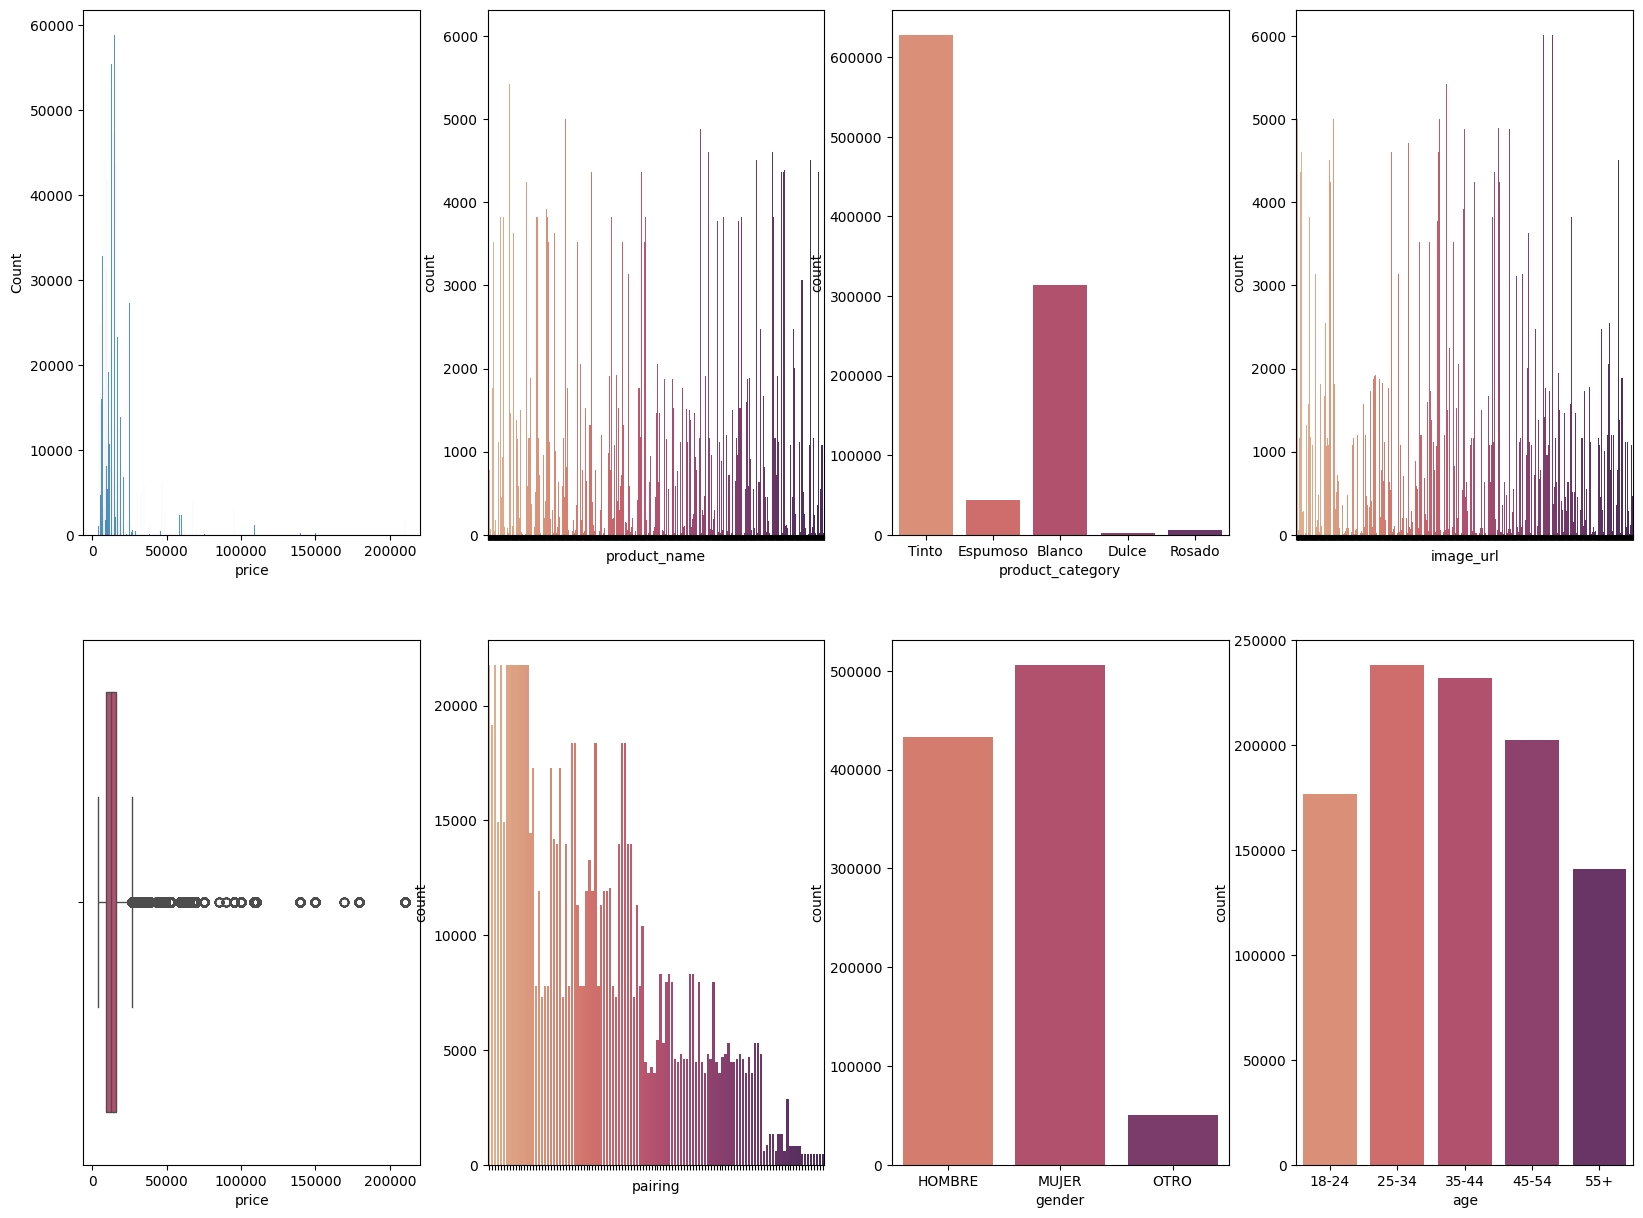

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 4, figsize=(20, 15))

sns.histplot(ax=ax[0,0], data = pairing_df, x = 'price', palette='flare')
sns.boxplot(ax=ax[1,0], data = pairing_df, x = 'price', palette='flare')
sns.countplot(ax=ax[0,1], data = pairing_df, x = 'product_name', palette='flare').set_xticklabels([])
sns.countplot(ax=ax[0,2], data = pairing_df, x = 'product_category', palette='flare')
sns.countplot(ax=ax[0,3], data = pairing_df, x = 'image_url', palette='flare').set_xticklabels([])
sns.countplot(ax=ax[1,1], data = pairing_df, x = 'pairing', palette='flare').set_xticklabels([])
sns.countplot(ax=ax[1,2], data = pairing_df, x = 'gender', palette='flare')
sns.countplot(ax=ax[1,3], data = pairing_df, x = 'age', palette='flare')
plt.show()